<font size=7> Summary Statistics

In [1]:
import os
import pickle
from human_hip.spike_data import text_summary_UUID, plot_summary, read_phy_files, plot_matrices_connectivity, plot_functional_connectivity_map
from human_hip.spike_data import eigenvalues_eigenvectors, plot_vector_layout
from ipywidgets import interact_manual

Here we run som summary statistics on the spiked data for our **4** datasets of interest. For each dataset, we only consider the dataset which contain no drugs or pertubations. We also only consider the datasets that were curated to our liking. To get these summary statistics, we used the app below.

## Text Summary

This function produces a summerary of all <b>curated</b> recordings in a folder. The information provided is as follows:
   - Name of the file from which we are displaying recording data
   - Number of spikes in the recording over all Neural Units
   - Length of recording in Seconds 
   - Number of Neural Units in recording deemed significant after curation
   - Averarge firing rate of tissue sample in spikes per second
   - Coefficent of Variation for recording, values being close to 1 signifying random firing and smaller values signifying less randomness in firing patterns
   
To use this function, run the cell below and use the interact widget to select the folder you wish to analyse, then hit the <b>Run Interact</b> button to display the information. Displays in order of appearance in directory. 

In [7]:
data_folders = os.listdir("/workspaces/human_hippocampus/data/ephys/")
interact_manual( text_summary_UUID, folder_name=data_folders ) 

interactive(children=(Dropdown(description='folder_name', options=('2023-05-10-e-hc52_18790', '2022-10-20-e-',â€¦

<function human_hip.spike_data.text_summary.text_summary_UUID(folder_name, data_path='/workspaces/human_hippocampus/data/ephys')>

## Basic Plots

This function provides two figures from a selected <b>curated</b> recording. The first figure is comprised of four subplots that depict the distrobution of interspike intervals, the distrobution of neural unit firing rate as a histogram and also ploted onto the neuron layout, and finally the spike raster of the first 30 seconds of the recording with the firing rate drawn over it. The second figure is the individual interspike intervals of the first 8 Neural Units. If there are less than 8 units in a curated sample the plot will display the total amount of units along with a warning that the Neural Unit count is under 8. To use this function, run the cell below and use the interact widget to select the file you wish to analyse, then hit the <b>Run Interact</b> button to display the figures.

In [5]:
#interact_manual( summary_UUID, filename=filenames)

In [4]:
#%run "/workspaces/human_hippocampus/dev/elliott/spike_data/Ari/basics_source_code.ipynb" 

In [2]:
with open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl', "rb") as my_file:
    sd = pickle.load(my_file)

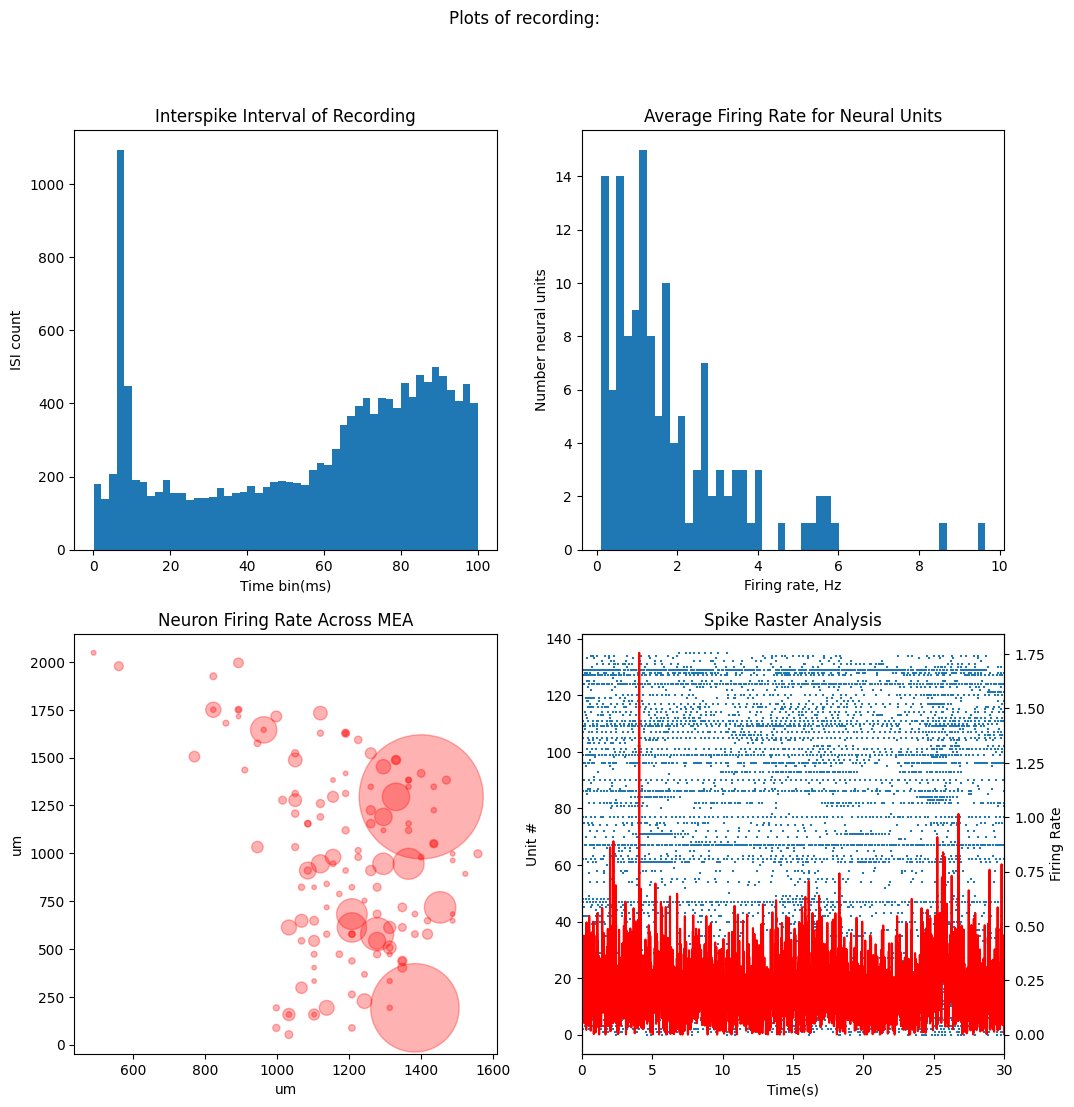

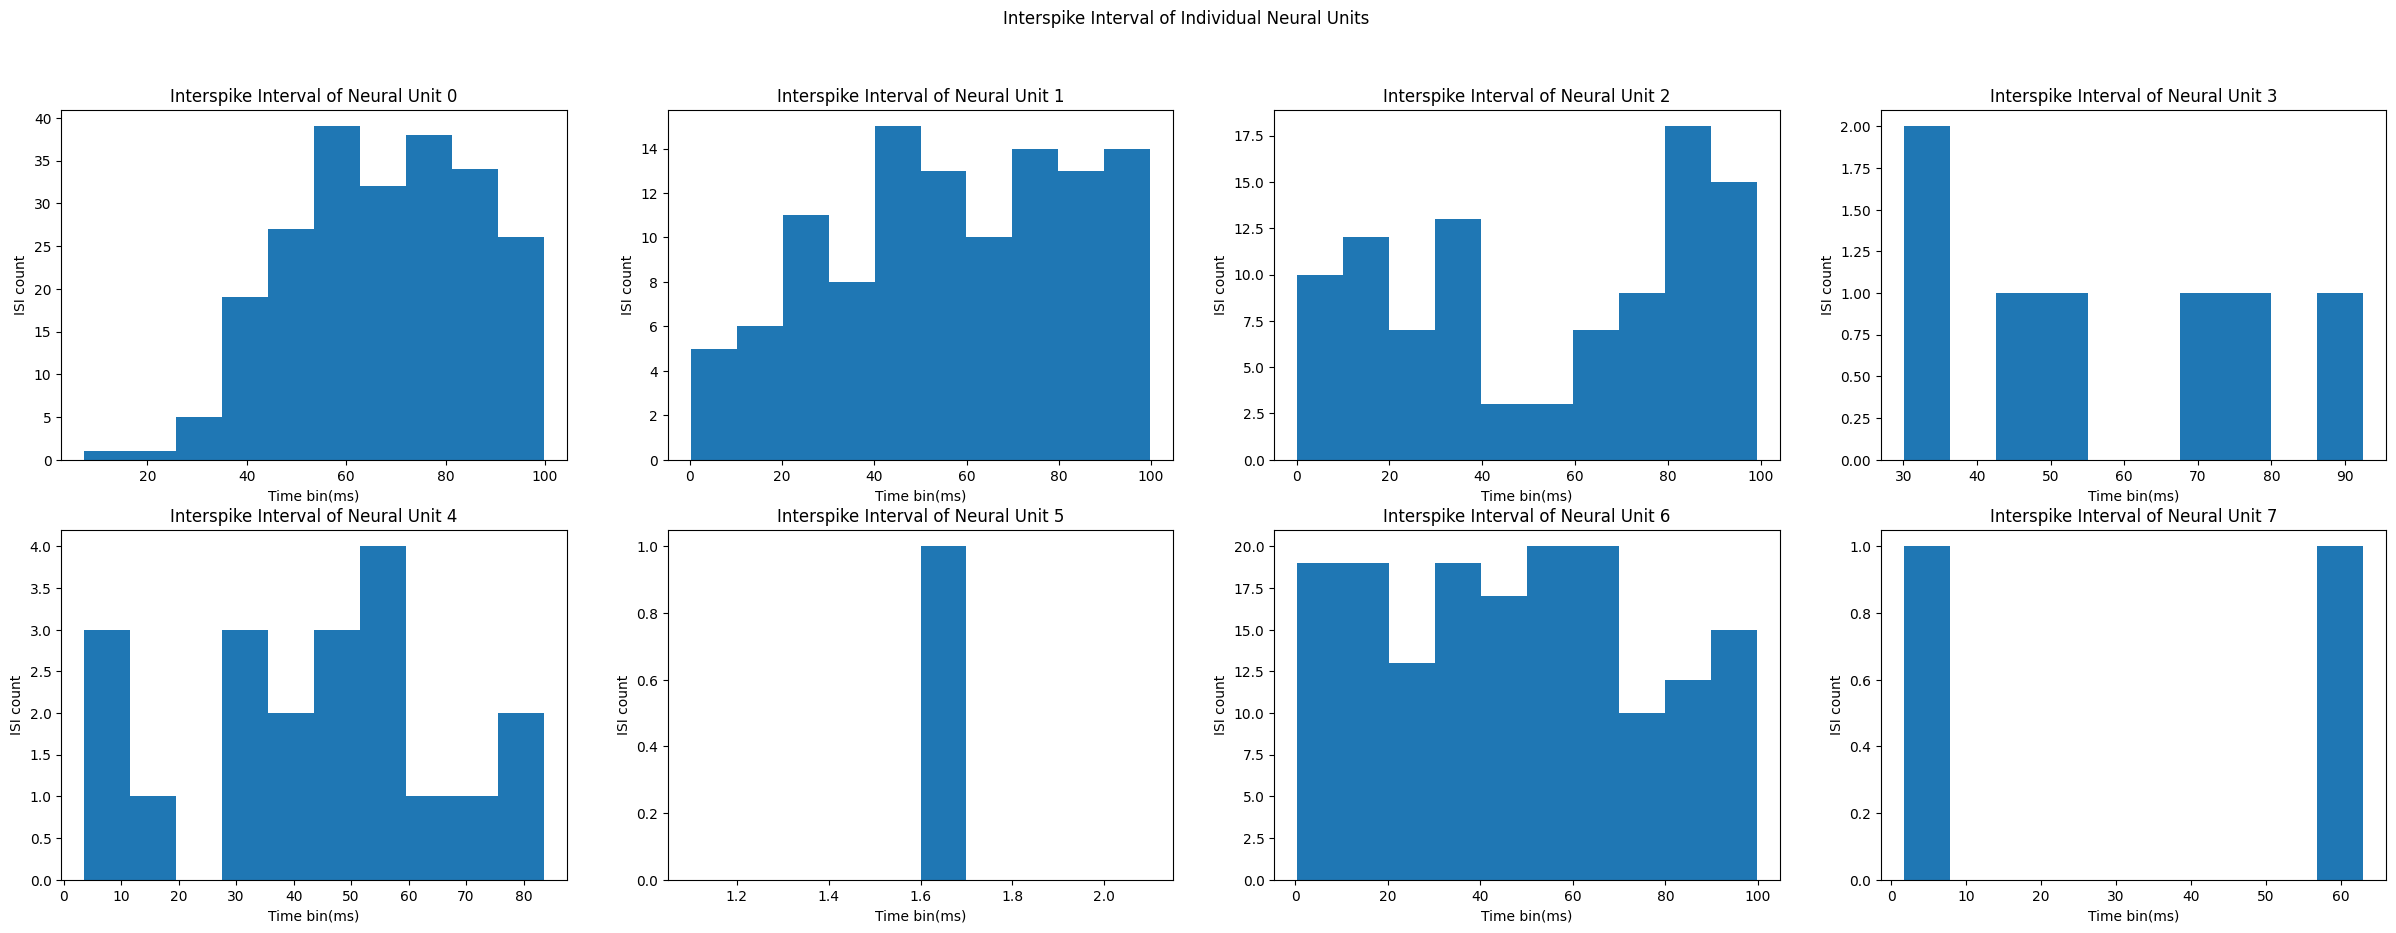

In [4]:
plot_summary( sd )

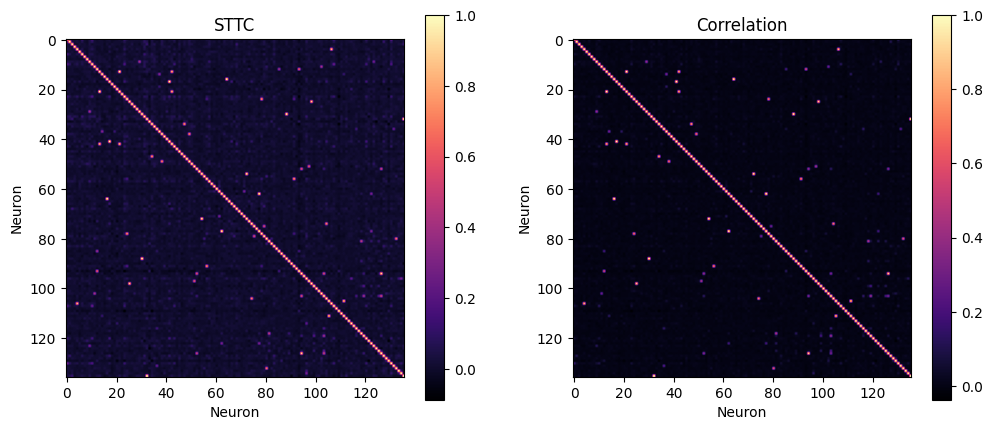

In [4]:
plot_matrices_connectivity( sd )

Plot functional connectivity matrix. <font color="orange">This takes a while to run (1.5 min).

calculating all latencies...
making plot


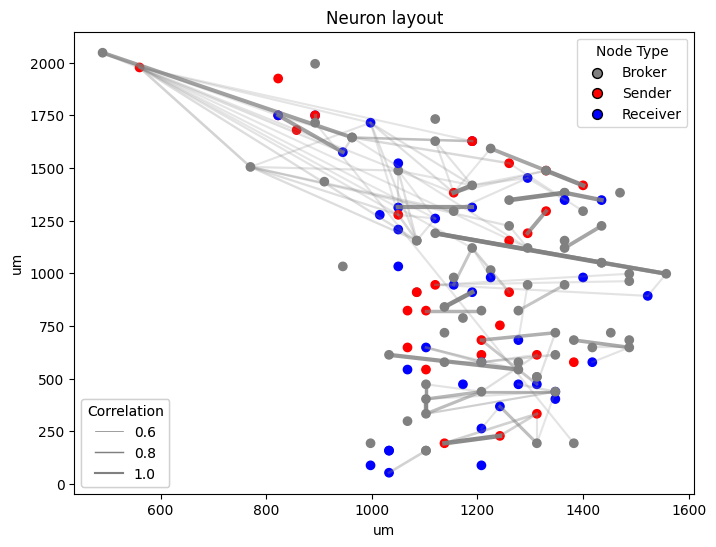

In [8]:
plot_functional_connectivity_map( sd )

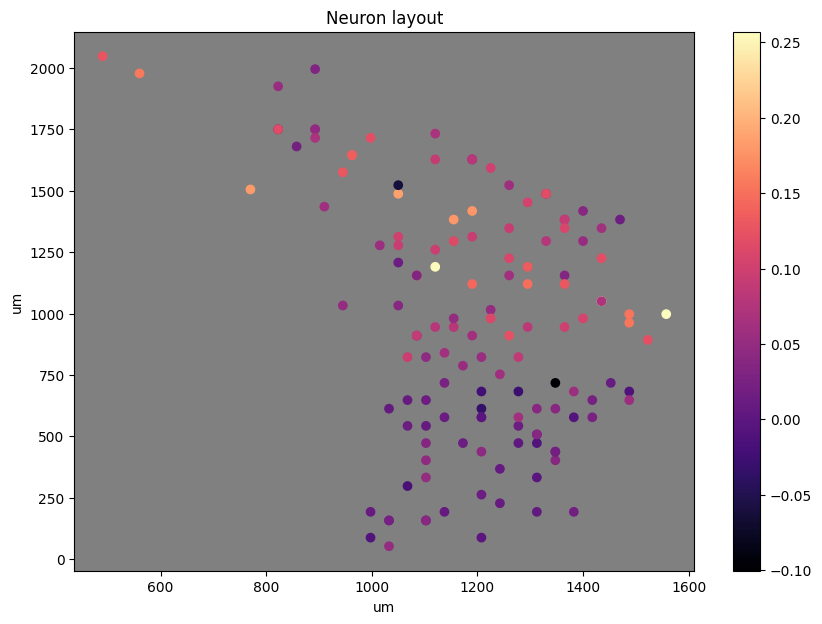

In [3]:
sttc_matrix = sd.spike_time_tilings()
sttc_eigenvalues, sttc_eigenvectors = eigenvalues_eigenvectors(sttc_matrix)
plot_vector_layout( sd, sttc_eigenvectors[:,0], show_sttc=False )


# <font color="brown"> OLD = Load datasets

Load dentate gyrus data

In [23]:
sd_dg = read_phy_files( "/workspaces/human_hippocampus/data/ephys/2022-11-02-e-Hc11.1-chip16753/derived/kilosort2/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_curated.zip" )


Load Ca1 Data

In [24]:
file = open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/StitchedDataUpdated.pkl', 'rb' )
sd_ca1 = pickle.load(file)
file.close()

load unknown data

In [26]:
file = open('/workspaces/human_hippocampus/data/ephys/2023-05-10-e-hc52_18790_unperturbed/5-10-23s1-CutData.pkl', 'rb' )
sd_na = pickle.load(file)
file.close()